In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
import pickle
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
data = pd.read_csv('HousingData.csv')

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Prepare the dataset

In [8]:
data = data.rename({'MEDV': 'Price'}, axis='columns')

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [10]:
#check null values
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [11]:
#Replace null values with the mean of column
for i in data.columns[data.isnull().any(axis=0)]:    
    data[i].fillna(data[i].mean(),inplace=True)

In [12]:
#check null values
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Explonatory Data Analysis

In [13]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


Text(0, 0.5, 'Price')

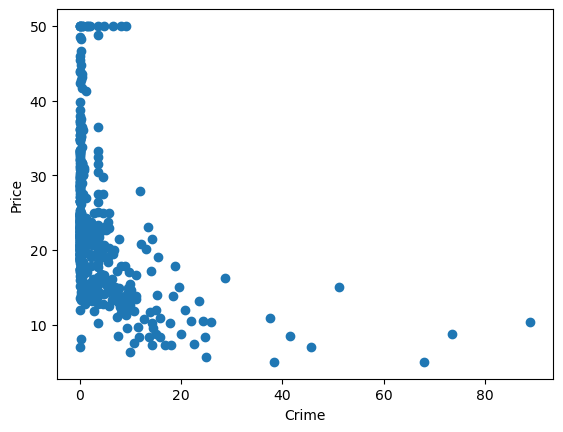

In [14]:
plt.scatter(data['CRIM'], data['Price'])
plt.xlabel("Crime")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

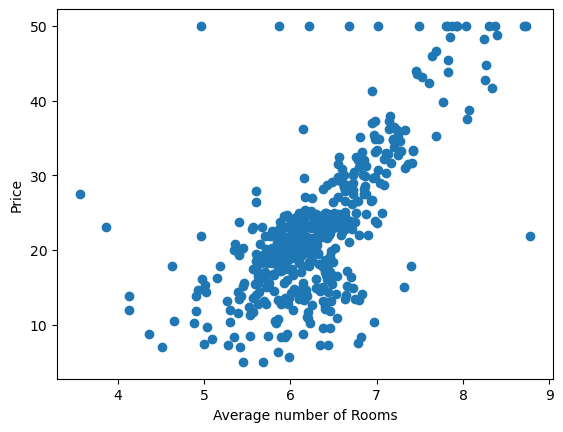

In [15]:
plt.scatter(data['RM'], data['Price'])
plt.xlabel("Average number of Rooms")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

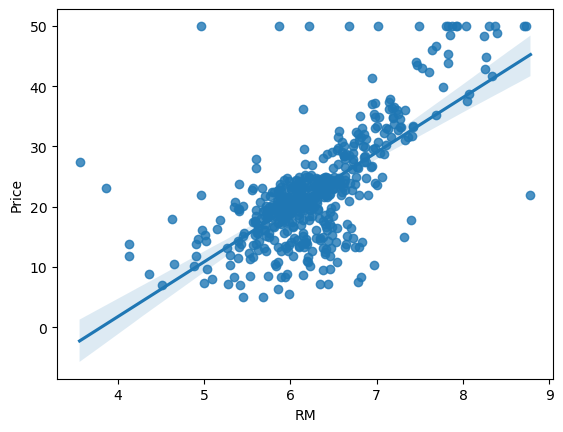

In [16]:
sns.regplot(x="RM", y="Price", data=data)

## Dependent and Independent Features

In [17]:
X = data.iloc[:, :-1] #All the prediction columns
y = data.iloc[:, -1]  #Target column

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.270000


In [20]:
## Standardize the dataset
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[-0.42002854, -0.51161896, -1.31729854, ...,  0.18727079,
         0.39651419, -1.04595325],
       [-0.4076886 , -0.51161896, -0.15405495, ..., -0.21208981,
         0.3870674 ,  0.03449941],
       [-0.40285597, -0.51161896, -0.61459839, ..., -0.16771641,
         0.42854113, -0.3261728 ],
       ...,
       [-0.42182865,  3.06664934, -1.34255415, ..., -0.56707702,
         0.35987906, -0.9336675 ],
       [ 0.93011786, -0.51161896,  1.04781486, ...,  0.8528718 ,
        -2.87841346,  1.55389374],
       [-0.39590057, -0.51161896, -0.36947043, ...,  1.16348561,
        -3.32828832, -0.26571124]])

## Model Training

In [24]:
regression = LinearRegression()

In [25]:
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
## Print the coefficients and the intercept

print(regression.coef_)

[-1.06184703  0.71347682 -0.07272768  0.94344207 -1.62856223  3.17333232
 -0.70109167 -3.04177516  1.69879013 -1.20047368 -1.99733627  1.02127847
 -3.28653232]


In [27]:
print(regression.intercept_)

23.01581920903955


In [28]:
## Parameters of the model
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Model Prediciton

In [29]:
reg_pred = regression.predict(X_test)

In [30]:
reg_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

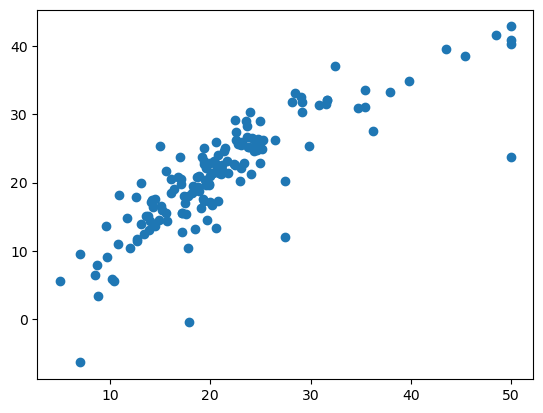

In [31]:
## Scatter plot for prediction
plt.scatter(y_test, reg_pred)

In [32]:
#Errors
residuals = y_test - reg_pred
residuals

173   -5.346842
274   -4.680947
491   -1.563343
72    -2.799770
452   -2.420504
         ...   
441   -3.386594
23     0.905782
225    9.774023
433   -2.093079
447   -5.269098
Name: Price, Length: 152, dtype: float64

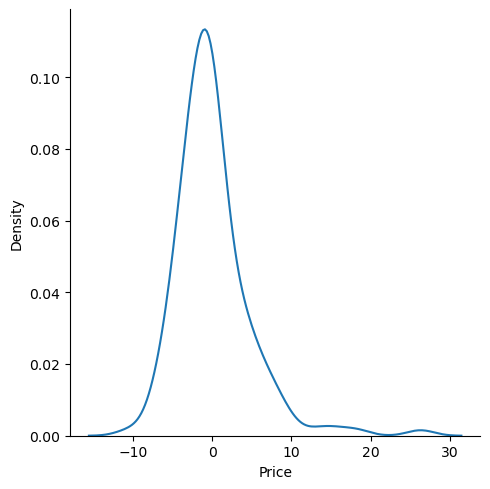

In [33]:
## Plot residuials 
sns.displot(residuals, kind='kde')

In [34]:
print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.141052567108469
21.81845795352606
4.67102322339828


## R square

In [35]:
score = r2_score(y_test, reg_pred)
print(score)

0.7071862632031753


## Prediction on new data

In [36]:
newDataTest = X_train[0].reshape(1, -1)

In [37]:
regression.predict(newDataTest)

array([25.27620754])

## Model Deployment

In [38]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [39]:
#Test model
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [40]:
pickle_model.predict(newDataTest)

array([25.27620754])